In [1]:
import pandas as pd
import requests
import numpy as np
import time
import requests
import bs4
import json
from pymongo.errors import DuplicateKeyError, CollectionInvalid
from pymongo import MongoClient

In [2]:
client = MongoClient()
# Initiate Database
db = client['nyt_articles']
# Initiate Table
tab_sanders = db['table_sanders']
tab_sanders.insert({'bernie': 'cool'})

db = client['nyt_articles']
tab_sanders = db['table_bush']
#tab_sanders.insert({'bernie': 'cool'})


In [3]:
db_comments = client['nyt_comments']

tab_sanders = db_comments['table_sanders']
db_comments.tab_sanders.insert({'sanders': 'cool'})

db_comments = client['nyt_comments']
tab_bush = db_comments['table_bush']
db_comments.tab_bush.insert({'bush': 'cool'})

ObjectId('560310ce1cd7eb62ec2de3da')

In [5]:
from nytimesarticle import articleAPI
api = articleAPI('74c73309c1052e6aa1785df7cd5cef8c:9:69947183')

In [58]:
# for i in range(100):
#     articles = api.search(q = 'Bernie Sanders', page = i)
#     print i
#     for y in range(len(articles['response']['docs'])):
#         new_data = articles['response']['docs'][y]
#         new_data['_id'] = articles['response']['docs'][y]['_id']
#         try:
#             db.table_sanders.insert(new_data)
#         except DuplicateKeyError:
#             print 'Peggy doesnt know why its a duplicate.'

In [33]:
NYT_URL = 'http://api.nytimes.com/svc/search/v2/articlesearch.json'
API_KEY = '74c73309c1052e6aa1785df7cd5cef8c:9:69947183'
import datetime as dt

In [50]:
# Query the NYT API once
def single_query(link, payload):
    response = requests.get(link, params=payload)
    if response.status_code != 200:
        print 'WARNING', response.status_code
    else:
        return response.json()

# Determine if the results are more than 100 pages
def more_than_100_pages(total_page):
    if total_page > 100:
        pages_left = min(total_page - 100, 100)
        return 100, pages_left, True
    else:
        return total_page, 0, False

# Looping through the pages give the number of pages
def loop_through_pages(total_pages, link, payload, table):
    for i in range(total_pages):
        if i % 50 == 0:
            print ' || Page ', i
        payload['page'] = str(i)
        content = single_query(link, payload)
        meta_lst = content['response']['docs']

        for meta in meta_lst:
            try:
                table.insert(meta)
            except DuplicateKeyError:
                print 'DUPS!'


# Scrape the meta data (link to article and put it into Mongo)
def scrape_meta(days=1):

    # The basic parameters for the NYT API
    link = NYT_URL
    payload = {'api-key': API_KEY, 'q' : 'Bernie Sanders', 'sort': 'newest'}

    today = dt.datetime(2015, 9, 22)
    yesterday = dt.datetime(2003, 9, 22)
    
    for day in range(days):
        payload['end_date'] = today.strftime("%Y%m%d")
        #yesterday = dt.date.today() - dt.timedelta(1)
        half_day = today - dt.timedelta(hours=12)
        payload['begin_date'] = yesterday.strftime("%Y%m%d")
        print payload
        print 'Scraping period: %s - %s ' % (str(yesterday), str(today))

        today -= dt.timedelta(days=2)
        
        content = single_query(link, payload)
        hits = content['response']['meta']['hits']
        total_pages = (hits / 10) + 1
        print 'HITS', hits

        newest_sort_pages, oldest_sort_pages, grt_100 = more_than_100_pages(total_pages)

        if grt_100:
            new_payload = payload.copy()
            old_payload = payload.copy()
            new_payload['sort']= 'newest'
            old_payload['sort'] = 'oldest'

        loop_through_pages(newest_sort_pages, link, new_payload, db.table_sanders)
        loop_through_pages(oldest_sort_pages, link, old_payload, db.table_sanders)

In [51]:
scrape_meta(days=1)

{'q': 'Bernie Sanders', 'sort': 'newest', 'begin_date': '20030922', 'api-key': '74c73309c1052e6aa1785df7cd5cef8c:9:69947183', 'end_date': '20150922'}
Scraping period: 2003-09-22 00:00:00 - 2015-09-22 00:00:00 
HITS 1206
 || Page  0
 || Page  50
 || Page  0
DUPS!
DUPS!
DUPS!
DUPS!


In [6]:
def single_query(link, payload):
    response = requests.get(link, params=payload)
    if response.status_code != 200:
        print 'WARNING', response.status_code
    else:
        return response.json()

In [54]:
# Query the NYT API once
def single_query(link, payload):
    response = requests.get(link, params=payload)
    if response.status_code != 200:
        print 'WARNING', response.status_code
    else:
        return response.json()

# Determine if the results are more than 100 pages
def more_than_100_pages(total_page):
    if total_page > 100:
        pages_left = min(total_page - 100, 100)
        return 100, pages_left, True
    else:
        return total_page, 0, False

# Looping through the pages give the number of pages
def loop_through_pages(total_pages, link, payload, table):
    for i in range(total_pages):
        if i % 50 == 0:
            print ' || Page ', i
        payload['page'] = str(i)
        content = single_query(link, payload)
        meta_lst = content['response']['docs']

        for meta in meta_lst:
            try:
                table.insert(meta)
            except DuplicateKeyError:
                print 'DUPS!'


# Scrape the meta data (link to article and put it into Mongo)
def scrape_meta(days=1):

    # The basic parameters for the NYT API
    link = NYT_URL
    payload = {'api-key': API_KEY, 'q' : 'Jeb Bush', 'sort': 'newest'}

    today = dt.datetime(2015, 9, 22)
    yesterday = dt.datetime(2003, 9, 22)
    
    for day in range(days):
        payload['end_date'] = today.strftime("%Y%m%d")
        #yesterday = dt.date.today() - dt.timedelta(1)
        half_day = today - dt.timedelta(hours=12)
        payload['begin_date'] = yesterday.strftime("%Y%m%d")
        print payload
        print 'Scraping period: %s - %s ' % (str(yesterday), str(today))

        today -= dt.timedelta(days=2)
        
        content = single_query(link, payload)
        hits = content['response']['meta']['hits']
        total_pages = (hits / 10) + 1
        print 'HITS', hits

        newest_sort_pages, oldest_sort_pages, grt_100 = more_than_100_pages(total_pages)

        if grt_100:
            new_payload = payload.copy()
            old_payload = payload.copy()
            new_payload['sort']= 'newest'
            old_payload['sort'] = 'oldest'

        loop_through_pages(newest_sort_pages, link, new_payload, db.table_bush)
        loop_through_pages(oldest_sort_pages, link, old_payload, db.table_bush)

In [55]:
scrape_meta(days=1)

{'q': 'Jeb Bush', 'sort': 'newest', 'begin_date': '20030922', 'api-key': '74c73309c1052e6aa1785df7cd5cef8c:9:69947183', 'end_date': '20150922'}
Scraping period: 2003-09-22 00:00:00 - 2015-09-22 00:00:00 
HITS 4197
 || Page  0
 || Page  50
 || Page  0
 || Page  50


In [18]:
for i in range(100):
    articles = api.search(q = 'Jeb Bush', page = i)
    print i
    for y in range(len(articles['response']['docs'])):
        new_data = articles['response']['docs'][y]
        new_data['_id'] = articles['response']['docs'][y]['_id']
        try:
            db.table_bush.insert(new_data)
        except DuplicateKeyError:
            print 'Peggy doesnt know why its a duplicate.'

In [59]:
links = db.table_sanders.find({"web_url": {'$exists': True}},{'web_url': 1, '_id' : 0})
links_s = []

for i in links:
    links_s.append(i['web_url'])
len(links_s)      

1206

In [4]:
url = pd.read_csv('../bush_urls.csv', header = None)
links = url[1].values

In [7]:
for url in links:
    link = "http://api.nytimes.com/svc/community/v3/user-content/url.json?url=" + url
    payload = {'api-key': 'f16ea9a0449b856bc44a665bfdaf82b0:15:73040063'}     
    content = single_query(link, payload)
    total = content['results']['totalCommentsFound'] 
    if total == 0:
        pass
    else:
        num_pages = list(np.arange(0, total, 25))  
        for i in num_pages:
            link = "http://api.nytimes.com/svc/community/v3/user-content/url.json?url=" + url
            payload = {'api-key': 'f16ea9a0449b856bc44a665bfdaf82b0:15:73040063', 'offset' : i}
            content = single_query(link, payload)
            
            if len(content['results']['comments']) != 0: 
                for y in range(len(content['results']['comments'])): 
                    new_data = content['results']['comments'][y]
                    new_data['web_url'] = url
                    new_data['_id'] = content['results']['comments'][y]['commentID']
                    try:
                        db_comments.tab_sanders.insert(new_data)
                    except DuplicateKeyError:
                        print 'Peggy doesnt know why its a duplicate.'
                        pass
            else:
                pass

Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its

KeyError: 'totalCommentsFound'

In [15]:
links = db.table_bush.find({},{'web_url': 1, '_id' : 0})
links_b = []

for i in links:
    if any(i) ==  False:
        pass
    else:
        links_b.append(str(i['web_url'])) 
len(links_b)

0

In [16]:
url = pd.read_csv('../bush_urls.csv', header = None)
links = url[1].values

API KEY: 287482b0ca06f168ffe4bc6a6de1fca1:10:73040699
API KEY: f16ea9a0449b856bc44a665bfdaf82b0:15:73040063

In [20]:
for url in links:
    link = "http://api.nytimes.com/svc/community/v3/user-content/url.json?url=" + url
    payload = {'api-key': '287482b0ca06f168ffe4bc6a6de1fca1:10:73040699'}     
    content = single_query(link, payload)
    total = content['results']['totalCommentsFound'] 
    if total == 0:
        pass
    else:
        num_pages = list(np.arange(0, total, 25))  
        for i in num_pages:
            link = "http://api.nytimes.com/svc/community/v3/user-content/url.json?url=" + url
            payload = {'api-key': '287482b0ca06f168ffe4bc6a6de1fca1:10:73040699', 'offset' : i}
            content = single_query(link, payload)
            
            if len(content['results']['comments']) != 0: 
                for y in range(len(content['results']['comments'])): 
                    new_data = content['results']['comments'][y]
                    new_data['web_url'] = url
                    new_data['_id'] = content['results']['comments'][y]['commentID']
                    try:
                        db_comments.tab_bush.insert(new_data)
                    except DuplicateKeyError:
                        print 'Peggy doesnt know why its a duplicate.'
                        pass
            else:
                pass

KeyboardInterrupt: 

In [22]:
comments = list(db_comments.tab_bush.find({}, {'commentBody': 1,  'web_url': 1, '_id':0})) #exclude ID
text = []
urls = []

# for i in range(len(comments)):
#     text.append(comments[i]['commentBody'])
for i in range(len(comments)):
    if comments[i].get('commentBody') == None:
        pass
    else:
        text.append(comments[i]['commentBody'].encode('utf-8'))
        urls.append(comments[i]['web_url'])

In [23]:
import pandas as pd
from itertools import *

df = pd.DataFrame(list(izip(text, urls)))

df.columns = ['Comment', 'URL']

df = df[:25000]
df.to_csv('bush_comments2.csv')

In [55]:
from alchemyapi import AlchemyAPI
alchemyapi = AlchemyAPI()

In [30]:
sentiment_s = []
score_list_s = []

text = db_comments.tab_sanders.find({},{'commentBody': 1, '_id' : 0}).limit(1000)
count = db_comments.tab_sanders.find({}).count()
for i in range(1000):
    myText = text[i]['commentBody']
    response = alchemyapi.sentiment("text", myText)
    sentiment_s.append(response["docSentiment"]["type"])
    if response["docSentiment"]["type"] == 'neutral':
        score_val = 0
    else:
        score_val = response["docSentiment"]["score"]
    
    score_list_s.append(score_val)


In [33]:
from itertools import *
sent = pd.DataFrame(sentiment_s)
sent.columns = ['Sentiment']
sent['Sentiment'].value_counts()
sanders = pd.DataFrame(list(izip_longest(sentiment_s, score_list_s)))

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

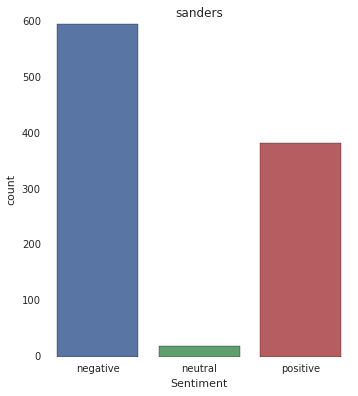

In [36]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sanders.columns = ['Sentiment', 'Score']
sanders['Score'] = sanders['Score'].astype(float)
sanders.sort('Sentiment', inplace=True)
ax = sns.countplot(x="Sentiment", data=sanders)
plt.title('sanders')

(-1.5, 1.5)

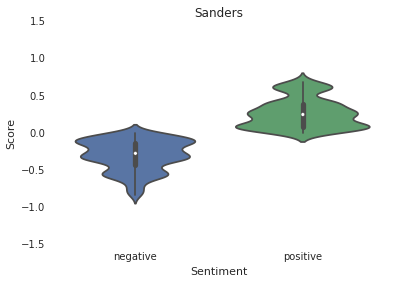

In [42]:
plt.figure(figsize=(6,4))
sanders1 = sanders[~(sanders == 0).any(axis=1)]
sns.violinplot(x="Sentiment", y='Score', data=sanders1)
plt.title('Sanders')
plt.ylim(-1.5,1.5)